#import libraries

In [ ]:
#!pip install skope-rules
#!pip install eli5
!pip install scikit-plot
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=f408856605ad048cbddfc314c56e2a6bcce9e34b3ec26ca869cba7253780b866
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 whi

In [ ]:

#!pip install lime

In [ ]:
import scikitplot as skplt
# import dalex to explain complex model
import dalex as dx

# load LimeTabularExplainer for LIME method
#from lime.lime_tabular import LimeTabularExplainer 

In [ ]:
import pandas as pd
import numpy as np
# load scikit-plot modules

# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (auc, average_precision_score, 
                              roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.base import BaseEstimator

In [ ]:
df = pd.read_csv("card_transdata.csv", sep= ',')

In [ ]:
df.shape

(288666, 8)

In [ ]:
raw=df.sample(frac=0.7,random_state=200) #random state is a seed value
test=df.drop(raw.index)

In [ ]:
raw.shape

(202066, 8)

In [ ]:
test.shape

(86600, 8)

In [ ]:
test.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,86600.000000,86600.000000,86600.000000,86600.000000,86600.000000,86600.000000,86600.000000,86599.000000
mean,26.679542,5.163180,1.820881,0.882783,0.351120,0.102090,0.651109,0.086918
std,65.335101,25.849838,2.734680,0.321681,0.477323,0.302768,0.476622,0.281716
min,0.024461,0.000856,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.888657,0.298859,0.474581,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.017077,1.007866,0.992356,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.627141,3.374313,2.090218,1.000000,1.000000,0.000000,1.000000,0.000000
max,4394.314607,2663.513077,76.364245,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,202066.000000,202066.000000,202066.000000,202066.000000,202066.000000,202066.000000,202066.000000,202066.000000
mean,26.680750,4.901785,1.811230,0.881623,0.351257,0.101254,0.651846,0.086422
std,63.880749,21.218949,2.814880,0.323055,0.477364,0.301666,0.476386,0.280987
min,0.021322,0.000419,0.005741,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.858351,0.295116,0.475285,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.933886,0.998678,0.996518,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.741649,3.343322,2.094497,1.000000,1.000000,0.000000,1.000000,0.000000
max,5797.972589,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Missing Values
raw.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
# Missing Values
test.isna().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             1
dtype: int64

In [ ]:
#drop missing values
test = test.dropna()

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202066 entries, 17401 to 223423
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              202066 non-null  float64
 1   distance_from_last_transaction  202066 non-null  float64
 2   ratio_to_median_purchase_price  202066 non-null  float64
 3   repeat_retailer                 202066 non-null  float64
 4   used_chip                       202066 non-null  float64
 5   used_pin_number                 202066 non-null  float64
 6   online_order                    202066 non-null  float64
 7   fraud                           202066 non-null  float64
dtypes: float64(8)
memory usage: 13.9 MB


In [ ]:
raw.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
for col in ["repeat_retailer","used_chip","used_pin_number","online_order"]:
  raw[col] = raw[col].astype(np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
num_var = raw.select_dtypes(include = 'number').columns

In [ ]:
cat_var = raw.select_dtypes(include = 'object').columns

# Data preprocessing

```
# This is formatted as code
```



## EDA 

##check correlation 


In [ ]:
raw[num_var].corr().style.background_gradient(cmap='Greens')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
distance_from_home,1.000000,-0.000566,-0.001372,0.191108
distance_from_last_transaction,-0.000566,1.000000,-0.000589,0.104003
ratio_to_median_purchase_price,-0.001372,-0.000589,1.000000,0.453634
fraud,0.191108,0.104003,0.453634,1.000000


There is one missing value for column umbrella_limit in row 290 because it is impossible for umbrella_limit to be less than **zero**

```
# This is formatted as code
```



## check outlier

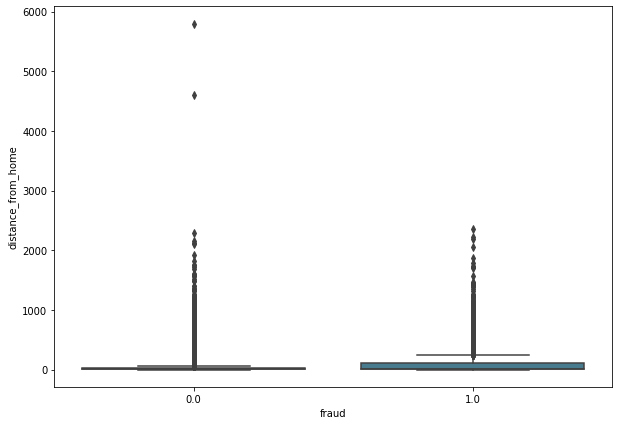

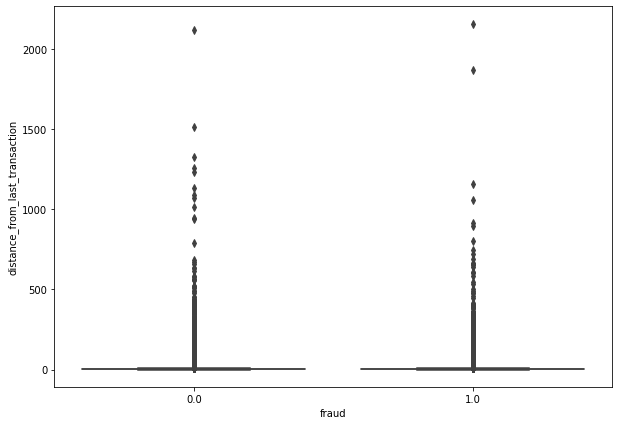

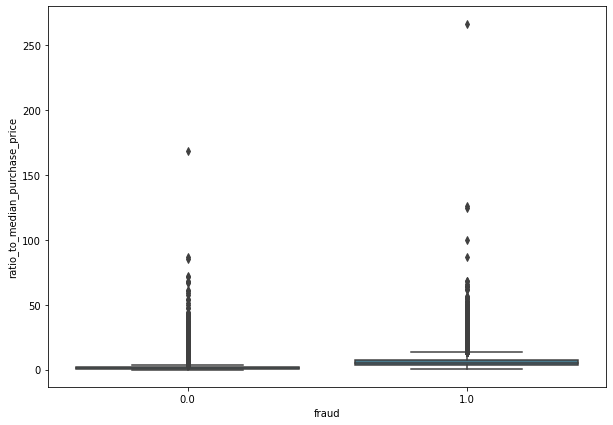

In [ ]:
for x_col in num_var:
    if x_col == "fraud":
      continue
    plt.figure(figsize = (10,7))
    sns.boxplot(x = "fraud", y=x_col, data = raw, palette= 'GnBu_d')
    plt.show()

## Dropping outlier

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
df_outlier_removed=remove_outlier_IQR(raw['distance_from_home'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=raw.index.difference(df_outlier_removed.index)


    


In [ ]:
ind_diff

Int64Index([    12,     15,     20,     37,     39,     54,     73,     92,
               112,    126,
            ...
            288485, 288530, 288532, 288561, 288589, 288599, 288638, 288647,
            288653, 288663],
           dtype='int64', length=20991)

In [ ]:
raw = raw.drop(ind_diff)

In [ ]:
raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
count,181075.000000,181075.000000,181075.000000,181075.000000
mean,13.174859,4.903757,1.811552,0.067629
std,13.145090,21.240862,2.838090,0.251110
min,0.021322,0.000419,0.005741,0.000000
25%,3.427143,0.294373,0.474698,0.000000
50%,8.260910,0.996536,0.994270,0.000000
75%,18.629290,3.342432,2.094002,0.000000
max,58.560284,2160.499922,266.689692,1.000000


In [ ]:
df_outlier_removed=remove_outlier_IQR(raw['distance_from_last_transaction'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=raw.index.difference(df_outlier_removed.index)


    


In [ ]:
raw = raw.drop(ind_diff)

In [ ]:
raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
count,158608.000000,158608.000000,158608.000000,158608.000000
mean,13.171288,1.483986,1.813637,0.062021
std,13.145593,1.756696,2.856434,0.241194
min,0.021322,0.000419,0.005741,0.000000
25%,3.425771,0.246367,0.474209,0.000000
50%,8.255295,0.751733,0.993686,0.000000
75%,18.624982,2.053955,2.096004,0.000000
max,58.560284,7.914330,266.689692,1.000000


In [ ]:
df_outlier_removed=remove_outlier_IQR(raw['ratio_to_median_purchase_price'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=raw.index.difference(df_outlier_removed.index)


    


In [ ]:
raw = raw.drop(ind_diff)

In [ ]:
raw.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
count,145435.000000,145435.000000,145435.000000,145435.00000
mean,13.178429,1.484345,1.214813,0.01237
std,13.160651,1.756415,1.015428,0.11053
min,0.021322,0.000419,0.005741,0.00000
25%,3.427993,0.246219,0.442212,0.00000
50%,8.254337,0.751355,0.888568,0.00000
75%,18.621085,2.056473,1.705725,0.00000
max,58.560284,7.914330,4.528352,1.00000


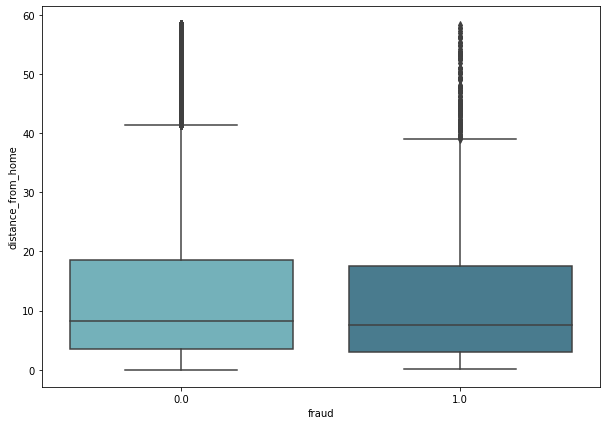

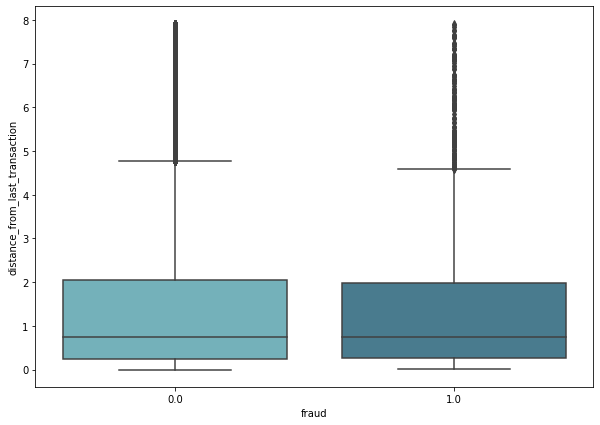

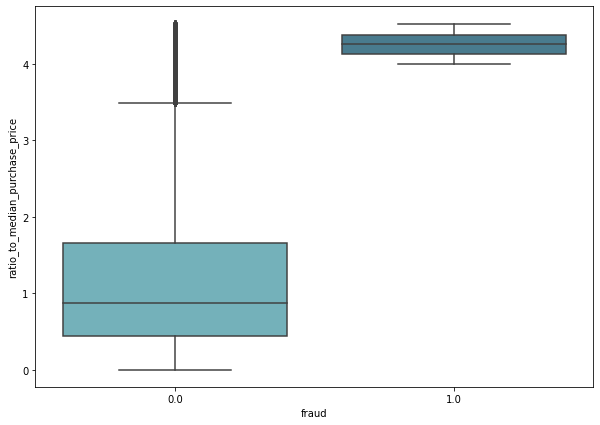

In [ ]:
for x_col in num_var:
    if x_col == "fraud":
      continue
    plt.figure(figsize = (10,7))
    sns.boxplot(x = "fraud", y=x_col, data = raw, palette= 'GnBu_d')
    plt.show()

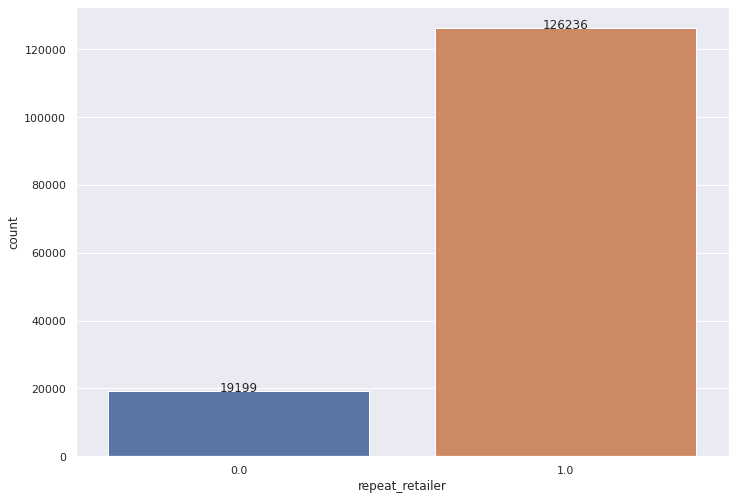

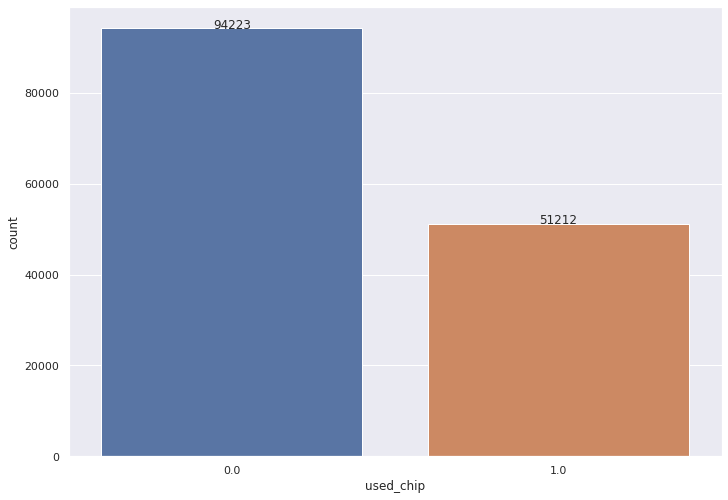

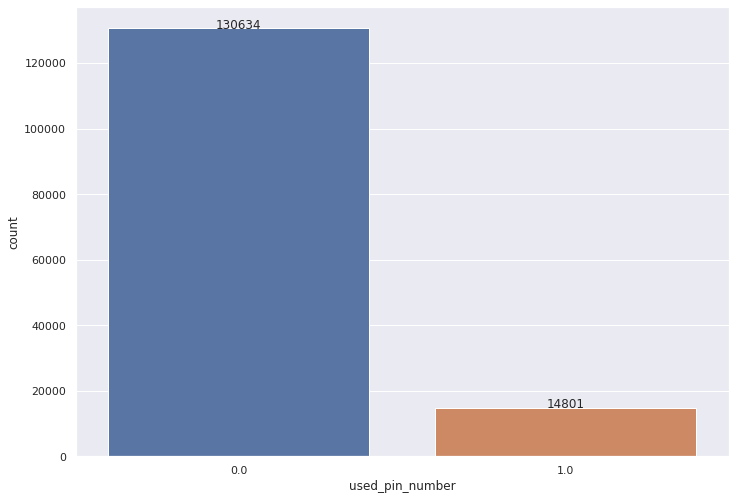

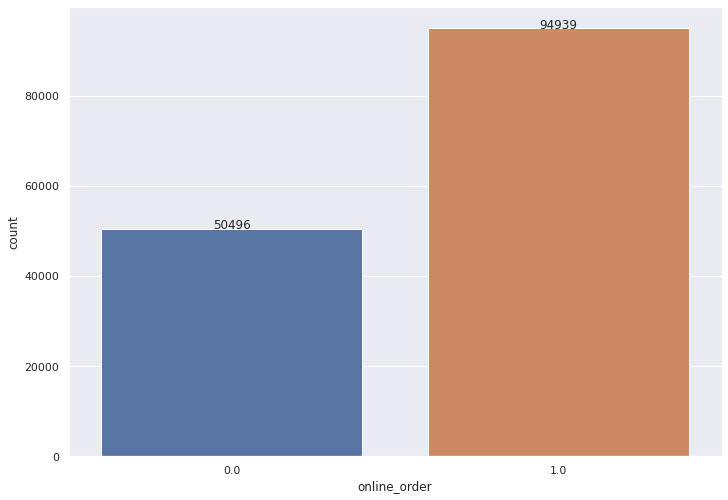

In [ ]:
#check distribution for categorical variables
for var in cat_var:
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plot_fe = sns.countplot(x = var, data = raw)
  for p in plot_fe.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    plot_fe.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+5, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center
  plt.show()


## check linearity of data

ref: https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290

In [ ]:
check_lin = raw.copy()

In [ ]:
continuous_var = check_lin.drop(columns=["fraud"]).select_dtypes(include = 'number').columns

In [ ]:
continuous_var

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price'],
      dtype='object')

In [ ]:
log_con = []

In [ ]:
# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)
for var in continuous_var:
    #check_lin[var] = np.square(check_lin[var])
    new_col = 'log_'+str(var)
    check_lin[new_col] = check_lin[var].apply(lambda x: x * np.log(x))
    log_con.append(new_col)

# Keep columns related to continuous variables
continuous_var = list(continuous_var)



In [ ]:
for var in log_con:
  continuous_var.append(str(var))

In [ ]:
# Redefining variables to include interaction terms
X_lt = check_lin[continuous_var]

In [ ]:
import statsmodels.api as sm

In [ ]:



# Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Building model and fit the data (using statsmodel's Logit)
logit_results = sm.GLM(check_lin["fraud"], X_lt_constant, family=sm.families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  fraud   No. Observations:               145435
Model:                            GLM   Df Residuals:                   145428
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 12 Jun 2022   Deviance:                          nan
Time:                        10:48:01   Pearson chi2:                 3.54e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
dist

# Modelling

interpretation: because the log variable for each continous variabel is significant, it means this data is not linear. so we will use non-linear classifier model

In [ ]:
for col in ['repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']:
  test[col] = test[col].astype(int)
  raw[col] = raw[col].astype(int)



y_test_churn = test["fraud"]
y_train_churn = raw["fraud"]
X_train_churn_scl = raw.drop(columns = ["fraud"])
X_test_churn_scl = test.drop(columns = ["fraud"])


## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(weights = 'distance')
k_range = [2,3,4,5]
param_grid = dict(n_neighbors=k_range, p=[1,2])
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_churn_scl, y_train_churn)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [ ]:
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.867814614290108
Best Hyperparameters: {'n_neighbors': 3, 'p': 1}


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors = 3, p= 1)
best_knn.fit(X_train_churn_scl, y_train_churn)

KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
# predict
pred_result = best_knn.predict(X_test_churn_scl)
pred_proba_result = best_knn.predict_proba(X_test_churn_scl)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, pred_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.961591,0.954010,0.961189,0.957800,0.960932
recall,0.997332,0.581507,0.961189,0.789419,0.961189
f1-score,0.979135,0.722575,0.961189,0.850855,0.956835
support,79072.000000,7527.000000,0.961189,86599.000000,86599.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


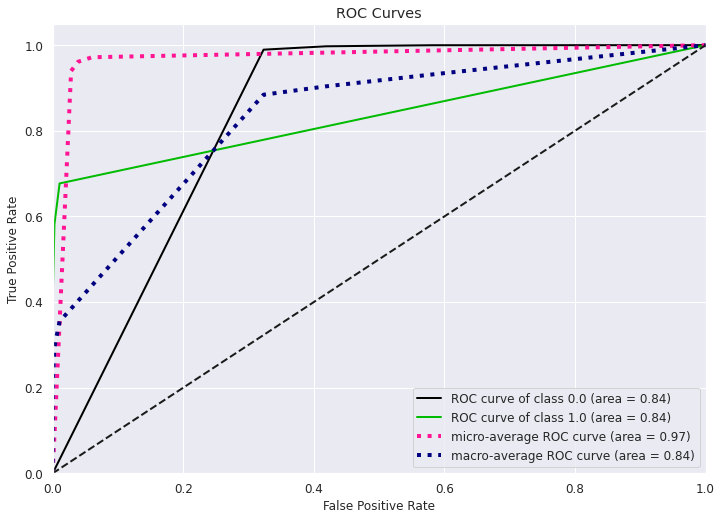

In [ ]:
skplt.metrics.plot_roc_curve(y_test_churn, pred_proba_result);

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test_churn, pred_proba_result[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)


Best Threshold=0.3333333333333333, G-Mean=0.8184619317080494


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, new_pred_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.969864,0.859214,0.962286,0.914539,0.960247
recall,0.989440,0.677029,0.962286,0.833235,0.962286
f1-score,0.979554,0.757319,0.962286,0.868437,0.960238
support,79072.000000,7527.000000,0.962286,86599.000000,86599.000000


Using G-means method, we did not improve the prediction of KNN. and its performance is worse than LogReg

In [ ]:
stop

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [10, 50,100],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [3,5,10,None],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train_churn_scl, y_train_churn)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]})

In [ ]:
print('Best Score: %s' % CV_rfc.best_score_)
print('Best Hyperparameters: %s' % CV_rfc.best_params_)

Best Score: 1.0
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
best_rfc = RandomForestClassifier(random_state=42, criterion = "gini", 
                                  max_depth = None, max_features = "sqrt", n_estimators = 100)
best_rfc.fit(X_train_churn_scl, y_train_churn)

RandomForestClassifier(max_features='sqrt', random_state=42)

In [ ]:
# predict
pred_result = best_rfc.predict(X_test_churn_scl)
pred_proba_result = best_rfc.predict_proba(X_test_churn_scl)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, pred_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.973122,1.000000,0.97478,0.986561,0.975458
recall,1.000000,0.709845,0.97478,0.854922,0.974780
f1-score,0.986378,0.830303,0.97478,0.908340,0.972812
support,79072.000000,7527.000000,0.97478,86599.000000,86599.000000


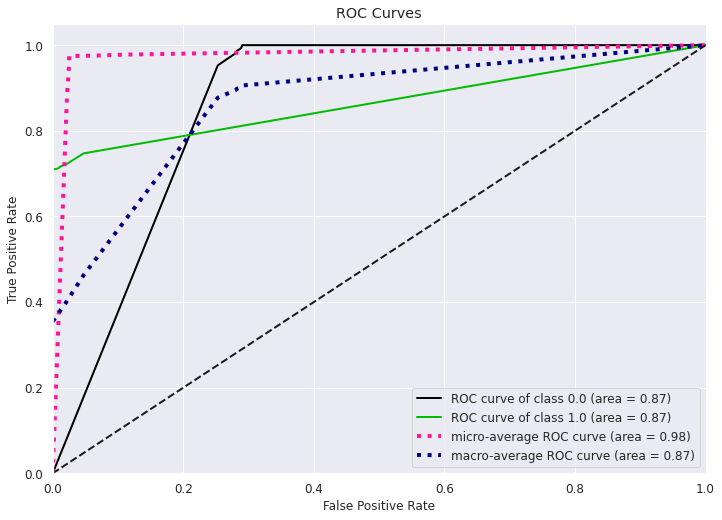

In [ ]:
skplt.metrics.plot_roc(y_test_churn, pred_proba_result);

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test_churn, pred_proba_result[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)


Best Threshold=0.01, G-Mean=0.8436815551937035


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, new_pred_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.975360,0.600342,0.934791,0.787851,0.942764
recall,0.952651,0.747177,0.934791,0.849914,0.934791
f1-score,0.963871,0.665759,0.934791,0.814815,0.937960
support,79072.000000,7527.000000,0.934791,86599.000000,86599.000000


## Final model selection

Discussion: among the 2 models, Random Forest is the best model with the highest f1-score (0.83) and the highest accuracy (0.81) Therefore, we select Random Forest as our choosen model



# Model Interpretation

In [ ]:
## initiate explainer for logreg model
best_rfc_exp = dx.Explainer(best_knn, X_train_churn_scl, y_train_churn, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 145435 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 145435 values
  -> model_class       : sklearn.neighbors._classification.KNeighborsClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f49fc3d29e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


  -> predicted values  : min = 0.0, mean = 0.012, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.667, mean = 0.00041, max = 0.667
  -> model_info        : package sklearn

A new explainer has been created!


## Feature Importance


In [ ]:
# visualizr permutation feature importance for Random Forest Model
model_part = best_rfc_exp.model_parts()

In [ ]:
model_part.plot()

## Interpration based on Feature Importance

Based on this feature importance,  incident severity has the most impact on prediction fraud cases. Therefore, the first thing that Bank needs to do is to inspect the incident severity level of any case. More detailed recommendation will depend on our Partial Dependant Plot



## Partial Dependant Plot

In [ ]:
# create partial dependence plot of Random Forest model
model_profile = best_rfc_exp.model_profile()

Calculating ceteris paribus: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


In [ ]:
model_profile.plot()

## Interpretation based on PDP

Recommendation on how to identify potential fraud cases: 

1.  Incident severity . Fraud customers may report their incident in their case with major damage severity level. They may think that if an incident has a major damage, it will increase the chance to get the insurance claim accepted 
2.  Age. Younger customers may submit a fraud insurance claim. this may be based on that young customers dont have a stable income yet, and if they need a big chunk of money, sometimes they will try to lies to insurance company
3.   Chess and Crossfit as hobbies. Somehow, our model think that fraud customers are likely to have chess or crossfit as a hobby. This does not make sense, but we can make this as initial trigger for us to be more careful if customers have Chess or Crossfit as their hobbies
4. Police report yes. those who submit a fraud insurance claim wont take a risk to get caught by filling a police report
5. Number of vehicle involved. those who submit a fraud insurance may say that there is a little number of vehicle involved because the more vehicle involved, the deceitful customers must provide a more convicing lie about how can many cars or vehicle involved
6. Property damaged Yes. those who submit a fraud insurance may say that they have property damaged to increase the chance of their insurance claim being accepted



# Link Github

Link Presentation:
https://docs.google.com/presentation/d/1-7Ib7gK40m6APo2foYVV7UHWxqkEFRCH53ZZiB7GTpo/edit?usp=sharing